# Awesome Data Analysis Company

Here at Awesome Data Analysis Company, we offer a wide range of data analysis services for any client.  We employ experts in the field of data analysis, each of whom specializes in an area of science, engineering, or mathematics.  You are receiving this IPython notebook in response to your Request for Information regarding three separate projects your company has in the works.

<Add background on three projects: climate and weather data, Newton's law of heating, and web scraping>

##Tools of the Trade
The Awesome Data Analysis Company makes extensive use of Python and IPython Notebooks to create polished, presentable, repeatable, and well-documented examples of automated data analysis.  IPython Notebooks are particularly useful for
.......explain uses of notebooks and some of the features.......  

Throughout this notebook, we will point out key features of our tools and explain how we use them to present clear, consise, and visually attractive electronic whitepapers.  Our company also offers a wide variety of Python, IPyhton, and Anaconda courses as well as general data analysis classes that you may purchase to train your employees on how to leverage this amazing technology for your business.

##Let's find some weather data!
Let's start with a small csv file containing weather data courtesy of NOAA's Climate Data Online (http://www.ncdc.noaa.gov/cdo-web/search)

The data was ordered using these search parameters:
1.  Custom Options: 	Station name, Geographic location
2.  Locations: 	ZIP:31088 - Warner Robins, GA 31088
3.  Data Types: 	SNOW - Snowfall (mm)
  1.  TMAX - Maximum temperature (tenths of &deg;C)
  3.  TMIN - Minimum temperature (tenths of &deg;C)
  5.  PRCP - Precipitation (tenths of mm)
  6.  TOBS - Temperature at the time of observation (tenths of &deg;C)

###A Quick Word on Markdown Text
Notice that in the paragraph is all text with some standard formats normally found in electronic documents.  This cell is called a Markdown cell because it uses the Markdown text to HTML conversion specification to generate HTML without writing any HTML code.  A header introduces the paragraph.  Headers are denoted by using a hashtag (#).  One hashtag designates the top-level header, and subsequent headers have multiple hashtags.  

There is also a numbered list of items in this paragraph.  Numbered lists are created by starting a line with a number followed by a period.  The numbers do not need to be in order; the Markdown converter takes care of assigning numbers to each item in the list.  Lower levels in the list are designated by indenting the numbers.

For more notebook formatting tips, try https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet.

###Read in the data
I saved the data file to my hard drive after ordering it from NOAA.  I gave the url variable a string containing the file path for the data and then I used the Pandas read_csv() function to read in the data from the csv file.  The argument "index_col='DATE'" treats the date column as the index for each row, the "parse_dates=True" argument parses the index column as a date, and "dayfirst=False" puts the month first in the date. The data is placed in a DataFrame object.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

url = "WarnerRobinsWeather 615991.csv"

df = pd.read_csv(url, index_col='DATE', parse_dates=True, dayfirst=False)

Now let's take a quick look at the dataset to make sure the data looks right. To do that, we use the head() function to show the first 2 rows of the dataset.  We see the station id and name, the elevation, latitude, longitude, precipitation, snowfall (which is -9999 because it did not snow), max temp, min temp, and temp at observation.  This appears as we expect, so we can move on.

In [12]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,144,6,100
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,10,-9999,133,78,106


Now let's look at some statistics. The describe() function shows statistics for our dataset.  We see that all of the observatuins take place at the same location, and that no snow fell during this period.

In [13]:
df.describe()

,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
count,269,269.0000,269.0000,269.000000,269,269.000000,269.000000,269.000000
mean,128,32.6094,-83.6163,32.877323,-9999,254.776952,142.639405,177.223048
std,0,0.0000,0.0000,77.797454,0,83.246053,84.909215,79.671354
min,128,32.6094,-83.6163,0.000000,-9999,11.000000,-94.000000,-56.000000
25%,128,32.6094,-83.6163,0.000000,-9999,194.000000,83.000000,133.000000
50%,128,32.6094,-83.6163,0.000000,-9999,278.000000,172.000000,206.000000
75%,128,32.6094,-83.6163,20.000000,-9999,322.000000,217.000000,239.000000
max,128,32.6094,-83.6163,467.000000,-9999,378.000000,256.000000,283.000000


We can see immediately that we have problems with the data: Tmax and Tmin are in tenths of a degree Celsius.  We need to do some do some unit conversions.

In [14]:
# convert from tenths of degrees C to degrees C
df['TMAX']= df['TMAX'] * 0.10
df['TMIN']= df['TMIN'] * 0.10
df['TOBS']= df['TOBS'] * 0.10

#convert from tenths of mm to mm
df['PRCP'] = df['PRCP'] * 0.10

In [15]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0,-9999,14.4,0.6,10.0
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,1,-9999,13.3,7.8,10.6


In [16]:
#convert to farenheit
df['TMAX'] = df['TMAX'] * 9/5 + 32
df['TMIN'] = df['TMIN'] * 9/5 + 32
df['TOBS'] = df['TOBS'] * 9/5 + 32

#convert from mm to inches
df['PRCP'] = df['PRCP'] * 0.0393701

In [17]:
df.head(2)

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00000,-9999,57.92,33.08,50.00
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.03937,-9999,55.94,46.04,51.08


Now let's look at some graphs.  This first graph is a plot of the daily maximum temperature from Jan 2015 to Oct 2015.  You can see from the plot some very obvious trends, such as the high temperatures for Jan-Mar range between the 30s and high 60s.  During July, August, and the first part of September the temperatures stayed between the 80s and 90s with some short trips into the triple digits.  Sounds like middle Georgia weather, right?

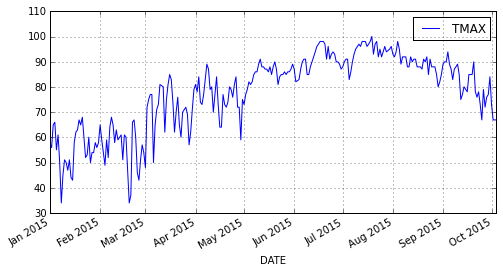

In [18]:
df[['TMAX']].plot(figsize=(8,4), style=['-']);

Here is an interactive data plotter.  It allows the user to select a column of data in the source file to graph from a dropdown menu.  Select a few to browse the data.

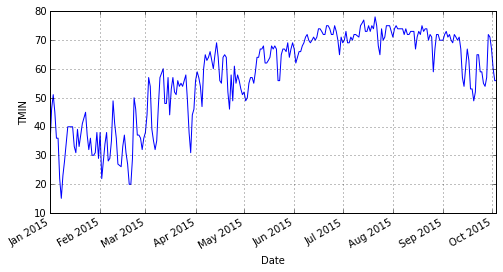

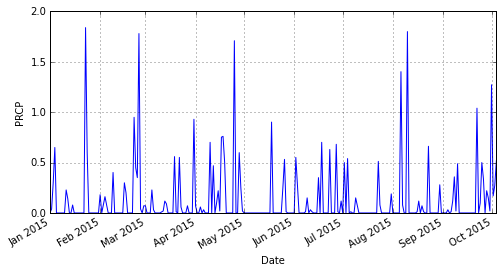

In [20]:
from IPython.html import widgets
from IPython.display import display, clear_output

column_headers_dropdown = widgets.Dropdown()
column_headers_dropdown.options  = {column: column for column in df.columns}
column_headers_dropdown.value = 'TMAX'
column_headers_dropdown.description = 'Select which column to graph (e.g. TMAX)'
display(column_headers_dropdown)
  
def replot():
    df[column_headers_dropdown.value].plot(figsize=(8,4), style=['-']);
    plt.xlabel('Date')
    plt.ylabel(column_headers_dropdown.value)
    
def on_trait_change():
    plt.close("all")
    replot()

column_headers_dropdown.on_trait_change(on_trait_change, 'value')

Now let's look at rainfall over the past calendar year to date.  From the plot, we can see there were 4 days so far in which the daily rainfall exceeded 1.5 inches.

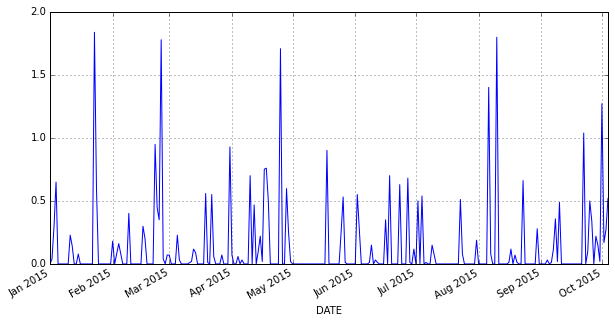

In [21]:
df['PRCP'].plot(figsize=(10,5), style=['-']);

Next we will find the total rainfall this year to date based on the weather data gathered at the weather station that collected our data,and confirm the number by crosschecking it with another resource. Using Python's pandas library, that is a simple matter of calling the sum() function.

In [22]:
df['PRCP'].sum()

34.818916440000002

Using [USClimateData.com](http://www.usclimatedata.com/climate/warner-robins/georgia/united-states/usga1271/2015/1) as a source and adding together the total monthly rainfall for each month gives a total year to date rainfall of 32.33 inches.  These numbers do not include rainfall for the first 4 days in October as the dataset shown here does, which accounts for the small discrepancy.

##Atmospheric Model

Now here is an atmospheric model based on data obtained from [NASA.gov](https://www.grc.nasa.gov/www/K-12/airplane/atmos.html).  It shows the temperature on a standard day (T = 59&deg;F).  Slide the bar to the left to see the temperatures at altitude on a cold day or to the right for a hot day.

The temperature at altitude is given by the equation:
    \begin{eqnarray*}
    T(h) & = & (T_i - lapserate * h) + \Delta T\\
    h & = & altitude (ft)\\
    T(h) & = & temperature at altitude (\circ F)\\
    T_i & = & temperature at sea level(\circ F)\\
    lapserate & = & rate of change in temperature with altitude\\
    & = & 0.00356 \circ F / ft\\
    \end{eqnarray*}
    
Simply use the slider to see the effect that having a non-standard day temperature has on the atmospheric temperature.  The slider represents temperature deviation from standard day in &deg;F.

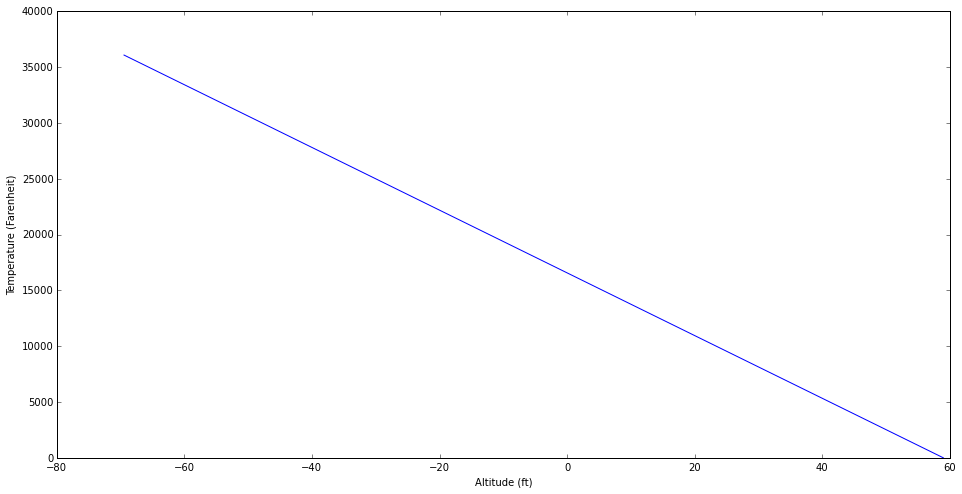

In [29]:
from IPython.html.widgets import interact
@interact
def plot(n=(-30, 30)):
    plt.figure(figsize=(16,8));
    alt_range =  range(0, 36089)
    alt = np.array(alt_range)  
    T = (59 - 0.00356 * alt) + n
    #P = 2116 * [(T + 459.7)/ 518.6]^5.256
    plt.plot(T, alt)
    #plt.plot(P, alt) 
    plt.xlabel('Altitude (ft)')
    plt.ylabel('Temperature (Farenheit)')
    plt.show()

Explain the Python code that makes this marvel of software engineering possible.

#Next Topic
Introduce the next topic.  And now for my next trick...

Data: ICAO Standard Atmosphere
Altitude	Temperature	Pressure	Density
[m]	[Fahrenheit]	[inches of mercury]	[kg/m3]

[Linear Regression](http://jmduke.com/posts/basic-linear-regressions-in-python/)
[Polyfit residuals](http://stackoverflow.com/questions/15721053/whats-the-error-of-numpy-polyfit)

    Altitude  Temperature   Pressure   Density
0          0         59.0  29.921300  1.225000
1       1000         47.3  26.540000  1.111640
2       2000         35.6  23.474900  1.006490
3       3000         23.9  20.703000  0.909122
4       4000         12.2  18.202400  0.819129
5       5000          0.5  15.952100  0.736116
6       6000        -11.2  13.932600  0.659697
7       7000        -22.9  12.125200  0.589501
8       8000        -34.6  10.512600  0.525168
9       9000        -46.3   9.078240  0.466348
10     10000        -58.0   7.806630  0.412707
11     11000        -69.7   6.683250  0.363918
12     12000        -69.7   5.708270  0.310828
13     13000        -69.7   4.875520  0.265483
14     14000        -69.7   4.164260  0.226753
15     15000        -69.7   3.556760  0.193674
16     16000        -69.7   3.037890  0.165420
17     17000        -69.7   2.594710  0.141288
18     18000        -69.7   2.216180  0.120676
19     19000        -69.7   1.892870  0.103071
20     20000 

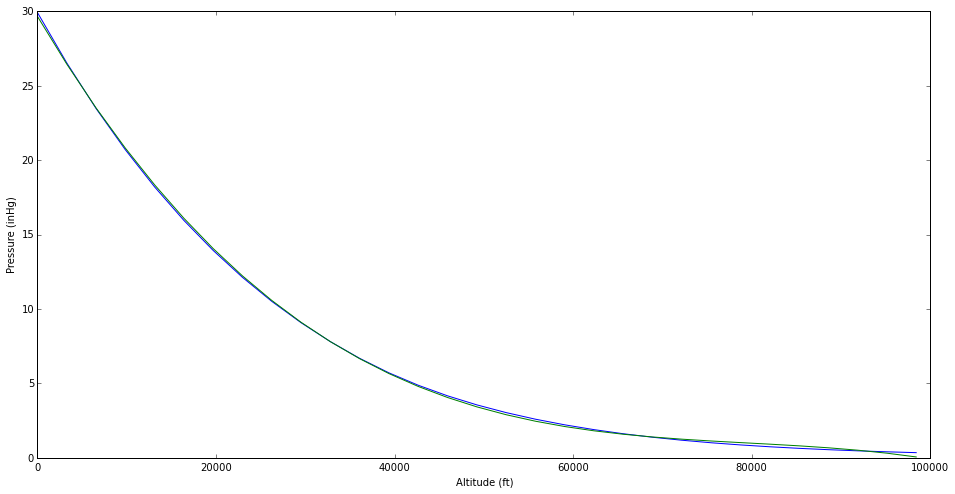

In [55]:
url = "ICAO Standard Atmosphere.csv"

data = pd.read_csv(url)

x = data['Altitude'] * 3.280839895013123 # 1 meter = 3.280839895013123 ft
y = data['Pressure']
print(data)
regression, residuals, _, _, _ = np.polyfit(x, y, 3, full = True)
print(regression)
print(residuals)
fx = regression[0] * x**3 + regression[1] * x**2 + regression[2] * x + regression[3]

plt.figure(figsize=(16,8));
plt.plot(x, y, label='Data')
plt.plot(x, fx, label='Fit') 
plt.xlabel('Altitude (ft)')
plt.ylabel('Pressure (inHg)')
plt.show()

As a reference, here is the data used in this notebook.

In [38]:
df

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,PRCP,SNOW,TMAX,TMIN,TOBS
DATE,,,,,,,,,,
2015-01-01,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,136.256,91.544,122.000
2015-01-02,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.10,-9999,132.692,114.872,123.944
2015-01-03,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.76,-9999,148.892,123.944,148.892
2015-01-04,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,1.65,-9999,150.836,112.928,112.928
2015-01-05,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,131.072,96.728,96.728
2015-01-06,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,141.764,96.728,112.928
2015-01-07,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,122.000,71.456,71.456
2015-01-08,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,93.164,59.144,73.400
2015-01-09,GHCND:USC00099124,WARNER ROBINS GA US,128,32.6094,-83.6163,0.00,-9999,112.928,73.400,96.728


#References

[Stack Overflow: IPython Widgets not showing values](http://stackoverflow.com/questions/29998190/ipython-notebook-widgets-not-showing-values)

[matthiaseisen: IPython Dropdown Widgets](http://matthiaseisen.com/pp/patterns/p0067/)

[moderndata: Interactive Python Notebooks](http://moderndata.plot.ly/widgets-in-ipython-notebook-and-plotly/)

[Exploring NYC 311 Calls: Sample IPython Notebook](http://nbviewer.ipython.org/gist/chriddyp/9827cb5086cfab8da092/Pandas%20Widget%20-%20Time%20Series,%20Search,%20and%20Filtering.ipynb)

[Stack Overflow: Write a degree symbol in Markdown](http://stackoverflow.com/questions/26234119/how-can-i-write-a-degree-symbol-in-rmarkdown2-for-html-and-pdf-output)

[Matplotlib: Writing mathematical expressions](http://matplotlib.org/1.3.0/users/mathtext.html)

[NASA.gov](https://www.grc.nasa.gov/www/K-12/airplane/atmos.html)

[USClimateData.com](http://www.usclimatedata.com/climate/warner-robins/georgia/united-states/usga1271/2015/1)
